## Boston AirBnB open data with the CRISP-DM (Cross Industry Process for Data Mining)

To get general AirBnB business insight, the Boston data from AirBnB will be analyzed based on the CRISP-DM. The subprocesses of the CRISP-DM are written below.

`1`. Business Understanding

`2`. Data Understanding

`3`. Prepare Data

`4`. Data Modeling

`5`. Evaluate the Results

`6`. Deploy

In [32]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar #To check holidays in the U.S
import time
import copy
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from functions_for_AirBnB import * # a file having necessary functions for preparing data

In [33]:
# Load the AirBnB files
df_listing, df_calendar, df_reviews = load_bnb_files()

## 1. Business Understanding

Business Questions 
    - What are the most relevant features of the groups over the 80 percentile and under the 20 percentile?
    - What are the distinctive features in the 80 percetile group for 2 people travellers and more than 4 people travellers?
    - How is the price of AirBnb adjusted in terms of seasons and locations?

## 2. Data Understanding

Check and play around the dataframes loaded before to get some idea or to get the business quesations progressed.
### 2.1. For df_listing

In [34]:
# Setting option for seeing the whole columns of dataframes
pd.set_option('display.max_columns', None)  

In [35]:
print(df_listing.shape)
df_listing.head(n=5)

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [36]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

<class 'pandas.core.series.Series'>
Index(['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')


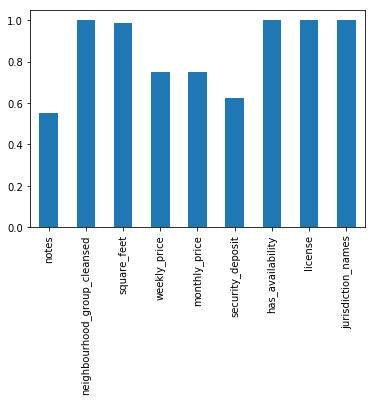

In [37]:
# Checking the columns consisting of missing values over 50%
df_missing = df_listing.isna().mean()
print(type(df_missing))
print(df_missing[df_missing>0.5].index)
df_missing[df_missing>0.5].plot.bar()

In [38]:
print("# of id:",df_listing.id.unique().size)
print("# of host_id:",df_listing.host_id.unique().size)
# There are some hosts who take care of more than two ids

# of id: 3585
# of host_id: 2181


# of accommodates: [ 4  2  3  5  1  8  6 16  7  9 10 12 11 14]
Int64Index([2, 4, 1, 3, 5, 6, 8, 7, 10, 9, 12, 11, 14, 16], dtype='int64')

Accomodates equal or less than 2 is 53.61 %
Accomodates more than 2 is 42.57 %


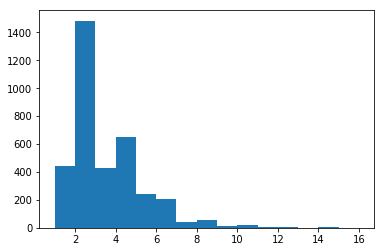

In [39]:
print("# of accommodates:",df_listing.accommodates.unique())
tmp = df_listing.accommodates.value_counts(ascending=False)/df_listing.accommodates.size
print(tmp.index)
print()
print("Accomodates equal or less than 2 is {:5.2f} %".format((tmp[1]+tmp[2])*100))
print("Accomodates more than 2 is {:5.2f} %".format((tmp[3]+tmp[4]+tmp[5]+tmp[6])*100))
# 96% of total id can be categorized into the group with less than 2 people or the group with more than 2 people
plt.hist(df_listing.accommodates, bins=15)
plt.show()

In [40]:
print("# of bed_type:",df_listing.bed_type.unique())

# of bed_type: ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']


### 2.2. For df_calendar

(1308890, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
None


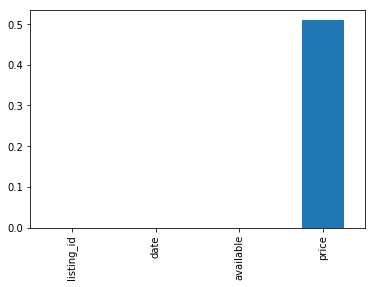

In [41]:
print(df_calendar.shape)
print(df_calendar.info())
df_missing_calendar = df_calendar.isna().mean()
df_missing_calendar.plot.bar()

## 3. Prepare data

## Strategies
- Drop columns having missing values over 50% 
- Drop columns related with urls and other irrelevant columns
- Drop columns having only one value or a duplicated column
- Check which columns are numerical or categorical
- Change a categorical colums having massive different values into a two boolean columns to save information
- Use one hot encoding to categorical features having suitable values 
- Impute columns having missing values over 30% to replace missing values with the mean values of corresponding columns
 

## Modifying df_calendar

In [42]:
# Get columns of year, month, day, weekday, us_holiday 
df_cal_modified = modify_calendar(df_calendar)

In [43]:
print(df_cal_modified.shape[0]/365)
# Each listing_id has 365 rows

3586.0


In [44]:
# Put the df_listing dataframe together with the columns coming from modify_calendar(df_calendar)
# The new added columns are  new 'unavail_days', 'avail_days_weekends', 'avail_days_weekdays', 
# 'price_weekend', and 'price_weekday' 
df_listing = add_availabledays_price(df_listing, df_cal_modified)
df_listing.tail(n=3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...","Depending on when you arrive, I can be here to...","Public transport is 5 minuts away, but walking...",The whole place including social areas is your...,NaN,NaN,https://a2.muscache.com/im/pictures/eb32a608-a...,https://a2.muscache.com/im/pictures/eb32a608-a...,https://a2.muscache.com/im/pictures/eb32a608-a...,https://a2.muscache.com/im/pictures/eb32a608-a...,11311919,https://www.airbnb.com/users/show/11311919,Vera,2014-01-14,"New York, New York, United States",NaN,within a day,78%,50%,f,https://a0.muscache.com/im/users/11311919/prof...,https://a0.muscache.com/im/users/11311919/prof...,NaN,1,1,['phone'],t,f,"Child Street, Cambridge, MA 02141, United States",NaN,Charlestown,NaN,Cambridge,MA,02141,Boston,"Cambridge, MA",US,United States,42.371771,-71.071300,f,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{""translation missing: en.hosting_amenity_49"",...",NaN,$198.00,NaN,NaN,NaN,NaN,1,$0.00,3,12,3 weeks ago,NaN,0,15,40,40,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN,325.0,11.0,29.0,122.818182,123.448276
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,NaN,NaN,NaN,NaN,NaN,https://a2.muscache.com/im/pictures/4b56e0c4-6...,https://a2.muscache.com/im/pictures/4b56e0c4-6...,https://a2.muscache.com/im/pictures/4b56e0c4-6...,https://a2.muscache.com/im/pictures/4b56e0c4-6...,74318064,https://www.airbnb.com/users/show/74318064,Medi,2016-05-27,"Somerville, Massachusetts, United States","Hi, I am very friendly, helpful, positive and ...",within an hour,100%,96%,f,https://a2.muscache.com/im/pictures/312fe94a-c...,https://a2.muscache.com/im/pictures/312fe94a-c...,Somerville,4,4,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"George St Somerville, Somerville, MA 02145, Un...",Somerville,Charlestown,NaN,Somerville,MA,02145,Boston,"Somerville, MA",US,United States,42.385226,-71.080923,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Kitchen,Gym,""Family/Kid Friendly"",Washer,Drye...",NaN,$65.00,NaN,NaN,$100.00,NaN,1,$30.00,1,13,today,NaN,5,5

In [45]:
print(df_listing.shape)

(3585, 100)


## Cleaning df_listing : 
    - removing irrelevant columns 
    - changing object type columns to numeric columns or manipulating them using one hot encoding (categorical values)
    - filling NaN values (missing values : imputing or dropping)
    - creating an integrated_score_log column by the natural log of the result from 'review_scores_rating' times 'number_of_reviews' +1 


In [46]:
df_listing_modi2 = clean_listing_df(df_listing)  
df_listing_modi2.shape

(3585, 269)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


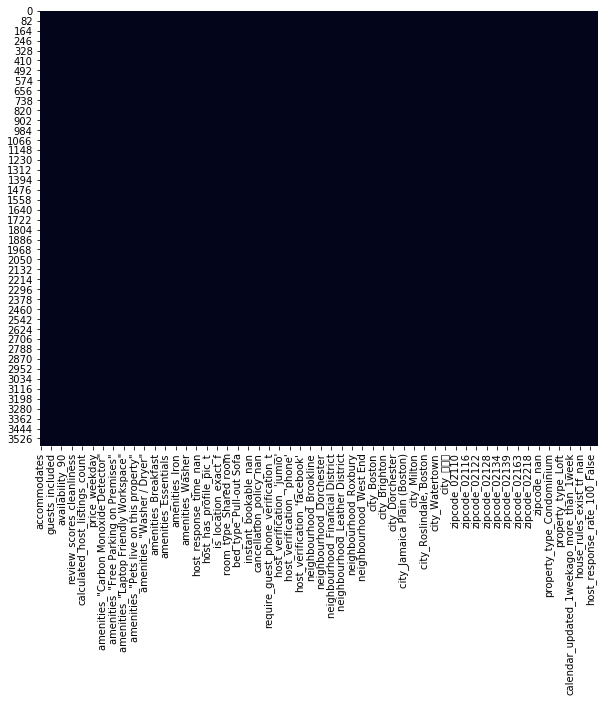

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_listing_modi2.isnull(), cbar=False)
check_null=list(df_listing_modi2.isnull().sum())
print(check_null)

In [48]:
df_listing_modi2.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West E

In [49]:
print(df_listing_modi2.integrated_score_log.describe())
print(df_listing_modi2.integrated_score_log.quantile(0.8))
print(df_listing_modi2.integrated_score_log.quantile(0.21))
print(df_listing_modi2.integrated_score_log.quantile(0.2109))

count    3585.000000
mean        5.325527
std         3.041916
min         0.000000
25%         4.531703
50%         6.175867
75%         7.566828
max        10.358155
Name: integrated_score_log, dtype: float64
7.836368513676909
0.0
2.63533862209331


(array([756.,   0.,   0.,   0.,   0.,   5.,   0.,  25., 356.,  63., 305.,
        303., 330., 329., 356., 299., 223., 140.,  71.,  24.]),
 array([ 0.        ,  0.51790777,  1.03581554,  1.55372332,  2.07163109,
         2.58953886,  3.10744663,  3.6253544 ,  4.14326218,  4.66116995,
         5.17907772,  5.69698549,  6.21489326,  6.73280103,  7.25070881,
         7.76861658,  8.28652435,  8.80443212,  9.32233989,  9.84024767,
        10.35815544]),
 <a list of 20 Patch objects>)

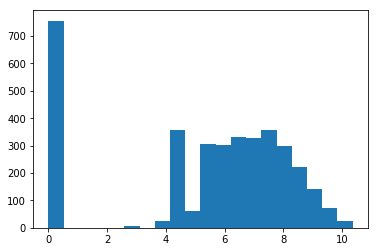

In [50]:
plt.hist(df_listing_modi2.integrated_score_log,bins=20)

In [51]:
# Conditioning df_listing_modi2 frame to categorize the dataset into poor, normal, high earner groups
df_listing_modi3 = conditioning_listing_df(df_listing_modi2)

In [52]:
df_listing_modi3.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,c

## Data modeling

In [53]:
# Store the 'y_label' feature in a new variable and remove it from the dataset
target = df_listing_modi3['y_label']
df_listing_modi3 = df_listing_modi3.drop('y_label', axis = 1)

In [54]:
df_listing_modi3.head(n=3)

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,c

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_listing_modi3, target, test_size=0.3, random_state=42)

In [56]:
print(X_train.shape)
print(X_test.shape)

(2509, 255)
(1076, 255)


In [57]:
model_list = [RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier]
train_list = []
test_list = []

for i in model_list:
    model = i(n_estimators=200)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_list.append(train_accuracy)
    test_list.append(test_accuracy)
    print(i,"Accuracy for training data:",train_accuracy)
    print(i,"Accuracy for testing data:", test_accuracy)

<class 'sklearn.ensemble.forest.RandomForestClassifier'> Accuracy for training data: 0.9996014348345954
<class 'sklearn.ensemble.forest.RandomForestClassifier'> Accuracy for testing data: 0.7379182156133829
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> Accuracy for training data: 0.670785173375847
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> Accuracy for testing data: 0.6384758364312267
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> Accuracy for training data: 0.8676763650856915
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'> Accuracy for testing data: 0.7314126394052045


In [36]:
# # Use GridSearch to find better hyperparameters for RandomForestClassifier
# start = time.time()
# classifier = RandomForestClassifier()
# param_for_rfc = {'n_estimators':[50,100,150,200,300], 'max_features':[30,40,50], "max_depth":[10,15,20]}
# # scoring = {'accuracy': make_scorer(accuracy_score)}
# grid_classifier = GridSearchCV(classifier, param_for_rfc, cv=10, return_train_score=True, n_jobs=-1)
# grid_classifier.fit(X_train, y_train)
# result = grid_classifier.cv_results_
# print("time to excute:", time.time() - start)
# grid_classifier.best_estimator_

time to excute: 254.48896503448486


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=50, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
result.

In [58]:
# Define the classifier, and fit it to the data
model = RandomForestClassifier(n_estimators=200, min_samples_leaf=2, max_features=50,
                               max_depth=15, bootstrap=True)
model.fit(X_train, y_train)
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_list.append(train_accuracy)
test_list.append(test_accuracy)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9449980071741729
The test accuracy is 0.7397769516728625


In [59]:
importances = model.feature_importances_ 
print(len(importances))
print()
# print(importances)

indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:16]]
values = importances[indices][:16]

tmp = 0
print("Feature     /    Importance value:")
for i,j in zip(columns, values):
    print(i,"/",j)
    tmp += j
    
print()    
print("The sum of 16 values of importance:", tmp)

255

Feature     /    Importance value:
host_verification_ 'reviews' / 0.10136735178634294
price_weekend / 0.045982406369108234
unavail_days / 0.04544146081885132
avail_days_weekdays / 0.045310682080086886
price_weekday / 0.04430885548163205
avail_days_weekends / 0.03794300826695176
cleaning_fee / 0.03494667448877018
minimum_nights / 0.022214212226998695
host_is_superhost_f / 0.020052879758957993
host_is_superhost_t / 0.018254788130827457
maximum_nights / 0.01806559085027581
accommodates / 0.017755181587060603
host_response_time_nan / 0.015264497775025176
host_response_time_within an hour / 0.014918354418459463
house_rules_exist_tf_True / 0.013445602249510153
house_rules_exist_tf_False / 0.0131272640133346

The sum of 16 values of importance: 0.5083988103021934


The sum of top 16 values of importance consists of 50% of the total importance. So, it is worth to check the 'high' and 'low' performance groups using these features.
 these features can be summarized into 9 fields. 
 
- 'host_verification' :  'reviews' 
- 'price' : both weekday and weekend
- 'available day'  :  both weekday and weekend
- 'cleaning_fee' : 
- 'minimum_nights' and 'maximum_nights'
- 'host_is_superhost' : superhost or not
- 'accommodates'
- 'host_response_time' : within an hour and none
- 'house_rules_exist' : exist or not exist

This results are going to be evaluated together with the result of PCA.

## PCA

In [60]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()
column_list = list(df_listing_modi3.columns)
scaled_values = scaler.fit_transform(df_listing_modi3.values)
df_listing_scaled = pd.DataFrame(scaled_values, index=df_listing_modi3.index, columns=df_listing_modi3.columns)
df_listing_scaled.shape

(3585, 255)

In [61]:
# Apply PCA to the data.
pca = PCA(n_components=200)
pca.fit(df_listing_scaled)

# Investigate the variance accounted for by each principal component.
tmp1 = 0
tmp2 = 0
for i in pca.explained_variance_ratio_:
    tmp1 += 1
    tmp2 += i
    print(tmp1, tmp2)
    if tmp2 > 0.9:
        break

1 0.03523668206792588
2 0.06635952398487688
3 0.08579671600015838
4 0.10262003866580402
5 0.1189921888240543
6 0.1335867836909505
7 0.14707150309992617
8 0.16040266389354524
9 0.17296006411782494
10 0.18476737272095442
11 0.1964524075946412
12 0.20799286461787145
13 0.21912756022657887
14 0.22998820545275378
15 0.24077516599105375
16 0.2511613459052606
17 0.26118426312115467
18 0.2710146594960716
19 0.28083435196817846
20 0.29038741875840607
21 0.29977253171287555
22 0.3090707687824777
23 0.3182180015852747
24 0.32733507681347096
25 0.3363457179612184
26 0.3451704118532239
27 0.3537881951726943
28 0.36232124845594543
29 0.3706641185905187
30 0.3789393859992559
31 0.38717698054478084
32 0.3952704333644117
33 0.40332881141866006
34 0.4111208221363832
35 0.41878435246483203
36 0.4263015075466365
37 0.4338093282188329
38 0.4411837798652408
39 0.4484727044905841
40 0.45560857394076615
41 0.46262964627945524
42 0.4694165381894389
43 0.4761877151481139
44 0.4828073395325346
45 0.4893091553684

In [62]:
# Apply PCA to the data.
pca = PCA(n_components=142, random_state=42)
pca.fit(df_listing_scaled)

PCA(copy=True, iterated_power='auto', n_components=142, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [63]:
# np.set_printoptions(precision=4)
# investigate(df_listing_scaled, pca, 1)
# investigate(df_listing_scaled, pca, 2)

positive to pca1: [('host_response_rate_100_True', '0.207'), ('host_response_time_within an hour', '0.196'), ('extra_people_fee_tf_True', '0.180'), ('amenities_"Carbon Monoxide Detector"', '0.170'), ('amenities_"Hair Dryer"', '0.161'), ('amenities_Hangers', '0.158'), ('calendar_updated_1weekago_yes', '0.158'), ('amenities_"Smoke Detector"', '0.155'), ('amenities_Shampoo', '0.154'), ('amenities_Iron', '0.152')]

negative to pca1: [('host_response_rate_100_False', '-0.207'), ('extra_people_fee_tf_False', '-0.180'), ('calendar_updated_1weekago_more_than_1week', '-0.158'), ('host_response_time_nan', '-0.154'), ('house_rules_exist_tf_False', '-0.149'), ('host_is_superhost_f', '-0.140'), ('host_acceptance_rate_100_False', '-0.134'), ('property_type_Apartment', '-0.118'), ('amenities_"Elevator in Building"', '-0.115'), ('cancellation_policy_flexible', '-0.109')]

positive to pca2: [('avail_days_weekends', '0.275'), ('avail_days_weekdays', '0.272'), ('require_guest_phone_verification_t', '0.22

(['avail_days_weekends',
  'avail_days_weekdays',
  'require_guest_phone_verification_t',
  'cancellation_policy_super_strict_30',
  'host_identity_verified_t',
  'require_guest_profile_picture_t',
  'host_response_time_within a few hours',
  "host_verification_ 'reviews'",
  'house_rules_exist_tf_True',
  "host_verification_ 'phone'"],
 ['unavail_days',
  'require_guest_phone_verification_f',
  'amenities_Hangers',
  'amenities_"Laptop Friendly Workspace"',
  'amenities_"Hair Dryer"',
  'amenities_Iron',
  'host_identity_verified_f',
  'require_guest_profile_picture_f',
  'amenities_Essentials',
  'host_response_time_nan'])

In [126]:
# Transform scaled dataframe
df_listing_scaled_transformed = pca.fit_transform(df_listing_scaled)
df_listing_scaled_transformed = pd.DataFrame(df_listing_scaled_transformed)
# Create new dataframe using 'df_listing_scaled_transformed' and 'target'
new_df = pd.concat([df_listing_scaled_transformed, target], axis=1)
new_df_total = new_df[new_df.y_label != 'normal']
new_df_total.y_label.unique()
new_df_total.head()
new_df_total = new_df_total.add_prefix('pca_')
new_df_total = new_df_total.rename(columns={"pca_y_label": "performance group"})
new_df_total.head(n=3)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24,pca_25,pca_26,pca_27,pca_28,pca_29,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,pca_41,pca_42,pca_43,pca_44,pca_45,pca_46,pca_47,pca_48,pca_49,pca_50,pca_51,pca_52,pca_53,pca_54,pca_55,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65,pca_66,pca_67,pca_68,pca_69,pca_70,pca_71,pca_72,pca_73,pca_74,pca_75,pca_76,pca_77,pca_78,pca_79,pca_80,pca_81,pca_82,pca_83,pca_84,pca_85,pca_86,pca_87,pca_88,pca_89,pca_90,pca_91,pca_92,pca_93,pca_94,pca_95,pca_96,pca_97,pca_98,pca_99,pca_100,pca_101,pca_102,pca_103,pca_104,pca_105,pca_106,pca_107,pca_108,pca_109,pca_110,pca_111,pca_112,pca_113,pca_114,pca_115,pca_116,pca_117,pca_118,pca_119,pca_120,pca_121,pca_122,pca_123,pca_124,pca_125,pca_126,pca_127,pca_128,pca_129,pca_130,pca_131,pca_132,pca_133,pca_134,pca_135,pca_136,pca_137,pca_138,pca_139,pca_140,pca_141,performance group
0,-1.332913,-0.924302,-0.088032,-2.832177,4.937275,2.379668,1.339706,0.535252,-0.795056,0.127097,-0.196954,-0.177570,-0.455775,0.139454,-0.213802,-0.225797,3.271111,3.030547,-0.508252,-2.123022,2.359935,0.101058,-2.646816,-0.850055,-3.700195,1.270303,0.661373,4.133362,-0.051895,-2.157198,-4.570852,0.478559,-0.955072,1.557406,-1.115219,-0.556854,-0.835601,-0.343742,0.409942,-0.198423,1.040546,-0.026697,0.511416,-0.007506,-0.224547,0.159042,0.053141,-0.614561,0.853760,-1.000340,0.073125,0.965495,-0.755720,-0.036202,1.069006,-0.729859,-0.231508,0.263039,-0.787003,0.104943,-0.700986,1.153031,-0.097875,0.132629,-0.148538,-0.667779,-0.148185,0.952405,-0.067528,0.042388,0.216674,-0.170199,-0.372080,1.004713,-0.497062,0.523010,-0.932122,0.331602,-0.457168,0.316197,-0.018754,0.033527,-0.103253,0.867450,-1.494938,-0.890819,0.106805,-0.516197,-0.298356,-0.374586,0.439233,-0.341768,-0.138144,-0.195024,-0.261939,-0.053512,0.254018,-0.516775,-0.894395,0.527460,-0.843149,0.290402,-0.701526,1.307748,0.304554,-0.681869,0.025993,1.307136,1.070907,-0.635127,1.007163,-0.680336,-0.371976,-0.774546,0.832741,-0.281024,-0.607965,-0.405383,0.084837,-0.756040,0.337328,-0.017684,0.376885,-0.039586,0.969886,1.156029,-1.906684,0.600693,0.286179,0.984301,1.140446,0.552722,1.222202,0.196671,-0.258862,1.000917,-2.947904,-0.676585,-0.163052,0.706125,-0.892724,-0.758235,poor
1,-1.673873,4.565411,0.957412,-0.530512,-1.665187,0.665176,0.130102,0.228968,-0.110520,2.660308,-1.253747,-0.333063,0.099411,-0.113477,1.251118,-1.264650,3.718714,3.190404,2.019505,-3.164663,0.360220,-0.400607,-3.811957,-1.204317,-4.923925,-0.517620,1.279373,3.648595,-0.724433,-3.661825,-1.507903,1.902403,-1.026652,2.122136,-1.698435,-0.474733,-1.423924,1.759268,-0.553547,1.432256,-0.086027,-0.793865,-0.486047,-1.191009,2.143809,-0.216469,-0.034539,-0.059132,1.608445,-2.281038,1.725784,2.380926,-0.840973,1.271857,0.058630,-1.724065,-1.968724,-0.733751,0.369222,-1.040725,-1.978518,0.425309,0.117984,0.533346,0.069771,-1.110529,0.864077,0.716847,0.061312,0.476451,-1.800379,-0.303349,-0.186526,1.921911,-0.142218,-0.587688,0.091885,0.425895,-0.031466,-0.433011,0.504527,-1.539968,0.055984,0.187405,-2.258998,-0.065751,0.542521,-0.057467,-0.238951,-0.626584,0.448876,-0.620047,0.231457,-0.002048,-0.585407,-0.513474,-0.118427,-0.511645,-1.067549,0.071905,-0.411950,-0.261858,-0.660754,1.586430,-0.257748,-0.940338,-0.312579,0.613177,1.454804,0.501034,-0.014458,-0.911934,-1.444849,0.103338,0.242610,0.834872,-0.535923,0.370343,0.488242,-0.025759,0.105760,-0.938535,1.833640,2.511565,1.963837,0.086394,-2.573546,0.471615,0.243081,1.549942,0.639391,-0.164706,0.508519,0.981804,0.194724,-0.645505,-1.584655,1.428004,0.194012,0.268638,-1.748827,-2.202052,high
2,-2.036351,3.504621,6.112145,-3.306885,-0.249315,0.245860,-2.222537,-2.495976,2.074228,0.096501,0.325221,-0.643353,-0.009130,-0.848107,0.482458,0.085402,3.365286,-0.790791,0.150854,-5.888296,3.249810,0.372888,-0.255789,-2.158821,-

In [129]:
# Compare mean values of pca components from the two dataframes
# Collect mean value of each pca component
poor_array = new_df_poor.describe().iloc[1:2].to_numpy().flatten()
high_array = new_df_high.describe().iloc[1:2].to_numpy().flatten()
df_compare = pd.DataFrame()
df_compare['poor'] = poor_array
df_compare['high'] = high_array
df_compare['difference'] = df_compare['poor'] - df_compare['high']
df_compare['difference'] = df_compare['difference'].abs()
df_pca = df_compare.sort_values(by=['difference'], ascending=False).head(n=10)
df_pca

,poor,high,difference
1,-1.582448,2.048677,3.631126
2,-0.814532,0.809411,1.623943
5,0.644539,-0.342508,0.987047
22,0.256589,-0.170173,0.426762
7,0.278939,-0.119438,0.398377
15,-0.272885,0.110172,0.383057
8,-0.119955,0.262644,0.382598
14,-0.156374,0.223752,0.380126
3,0.274745,-0.080822,0.355568
25,-0.218149,0.083957,0.302106


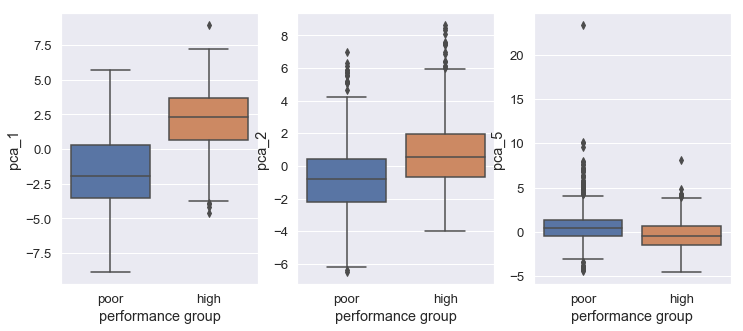

In [171]:
sns.set(font_scale=1.2)
figure, axes = plt.subplots(1,3, figsize=(12,5))
ax0 = sns.boxplot(x='performance group', y='pca_1', data=new_df_total, ax=axes[0])
ax1 = sns.boxplot(x='performance group', y='pca_2', data=new_df_total, ax=axes[1])
ax3 = sns.boxplot(x='performance group', y='pca_5', data=new_df_total, ax=axes[2])

After comparing mean values of components of pca, it is found that pca1 and pca2 components are worth to be checked. 

In [139]:
df_listing_modi3_with_label = pd.concat([df_listing_modi3, target], axis=1)
df_listing_modi3_with_label.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,c

In [140]:
df_listing_poor = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'poor']
df_listing_high = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'high']

In [163]:
#  for pca1 : 
pos_list_1, neg_list_1 = investigate(df_listing_scaled, pca, 1)
data_pos_1 = [[df_listing_high[x].mean(), df_listing_poor[x].mean()] for x in pos_list_1]
data_neg_1 = [[df_listing_high[x].mean(), df_listing_poor[x].mean()] for x in neg_list_1]
tmp_pos_1 = pd.DataFrame(data=data_pos_1 , index=pos_list_1, columns=['high', 'poor'])
tmp_neg_1 = pd.DataFrame(data=data_neg_1 , index=neg_list_1, columns=['high', 'poor'])
tmp_both_1 = pd.concat([tmp_pos_1, tmp_neg_1])
tmp_both_1["difference"] = tmp_both_1.high - tmp_both_1.poor
tmp_both_1["difference"] = tmp_both_1["difference"].abs()

positive to pca1: [('host_response_rate_100_True', '0.207'), ('host_response_time_within an hour', '0.196'), ('extra_people_fee_tf_True', '0.180'), ('amenities_"Carbon Monoxide Detector"', '0.170'), ('amenities_"Hair Dryer"', '0.161'), ('amenities_Hangers', '0.158'), ('calendar_updated_1weekago_yes', '0.158'), ('amenities_"Smoke Detector"', '0.155'), ('amenities_Shampoo', '0.154'), ('amenities_Iron', '0.152')]

negative to pca1: [('host_response_rate_100_False', '-0.207'), ('extra_people_fee_tf_False', '-0.180'), ('calendar_updated_1weekago_more_than_1week', '-0.158'), ('host_response_time_nan', '-0.154'), ('house_rules_exist_tf_False', '-0.149'), ('host_is_superhost_f', '-0.140'), ('host_acceptance_rate_100_False', '-0.134'), ('property_type_Apartment', '-0.118'), ('amenities_"Elevator in Building"', '-0.115'), ('cancellation_policy_flexible', '-0.109')]



In [164]:
tmp_both_1.sort_values(by=['difference'], ascending=False)[0:10]

,high,poor,difference
host_response_rate_100_False,0.186890,0.619048,0.432158
host_response_rate_100_True,0.813110,0.380952,0.432158
house_rules_exist_tf_False,0.132497,0.554233,0.421736
host_response_time_within an hour,0.629010,0.257937,0.371073
extra_people_fee_tf_False,0.437936,0.787037,0.349101
extra_people_fee_tf_True,0.562064,0.212963,0.349101
host_response_time_nan,0.008368,0.310847,0.302478
cancellation_policy_flexible,0.145049,0.433862,0.288814
host_is_superhost_f,0.700139,0.982804,0.282665
"amenities_""Elevator in Building""",0.119944,0.357143,0.237199


In [165]:
# For pca2
pos_list_2, neg_list_2 =  investigate(df_listing_scaled, pca, 2)
data_pos_2 = [[df_listing_high[x].mean(), df_listing_poor[x].mean()] for x in pos_list_2]
data_neg_2 = [[df_listing_high[x].mean(), df_listing_poor[x].mean()] for x in neg_list_2]
tmp_pos_2 = pd.DataFrame(data=data_pos_2 , index=pos_list_2, columns=['high', 'poor'])
tmp_neg_2 = pd.DataFrame(data=data_neg_2 , index=neg_list_2, columns=['high', 'poor'])
tmp_both_2 = pd.concat([tmp_pos_2, tmp_neg_2])
tmp_both_2["difference"] = tmp_both_2.high - tmp_both_2.poor
tmp_both_2["difference"] = tmp_both_2["difference"].abs()

positive to pca2: [('avail_days_weekends', '0.275'), ('avail_days_weekdays', '0.272'), ('require_guest_phone_verification_t', '0.226'), ('cancellation_policy_super_strict_30', '0.174'), ('host_identity_verified_t', '0.160'), ('require_guest_profile_picture_t', '0.154'), ('host_response_time_within a few hours', '0.139'), ("host_verification_ 'reviews'", '0.130'), ('house_rules_exist_tf_True', '0.129'), ("host_verification_ 'phone'", '0.125')]

negative to pca2: [('unavail_days', '-0.273'), ('require_guest_phone_verification_f', '-0.226'), ('amenities_Hangers', '-0.176'), ('amenities_"Laptop Friendly Workspace"', '-0.172'), ('amenities_"Hair Dryer"', '-0.167'), ('amenities_Iron', '-0.165'), ('host_identity_verified_f', '-0.160'), ('require_guest_profile_picture_f', '-0.154'), ('amenities_Essentials', '-0.148'), ('host_response_time_nan', '-0.133')]



In [166]:
tmp_both_2.sort_values(by=['difference'], ascending=False)[0:10]

,high,poor,difference
unavail_days,131.564854,212.201058,80.636205
avail_days_weekdays,168.202232,109.603175,58.599057
avail_days_weekends,65.232915,43.678571,21.554343
house_rules_exist_tf_True,0.867503,0.445767,0.421736
host_verification_ 'reviews',1.000000,0.682540,0.317460
host_response_time_nan,0.008368,0.310847,0.302478
host_identity_verified_f,0.135286,0.416667,0.281381
host_identity_verified_t,0.864714,0.583333,0.281381
"amenities_""Hair Dryer""",0.564854,0.496032,0.068822
require_guest_profile_picture_f,0.938633,0.997354,0.058721


In [168]:
# Chekc also pca0 to find other relavant original features 
pos_list_0, neg_list_0 = investigate(df_listing_scaled, pca, 0)
data_pos_0 = [[df_listing_high[x].mean(), df_listing_poor[x].mean()] for x in pos_list_0]
data_neg_0 = [[df_listing_high[x].mean(), df_listing_poor[x].mean()] for x in neg_list_0]
tmp_pos_0 = pd.DataFrame(data=data_pos_0 , index=pos_list_0, columns=['high', 'poor'])
tmp_neg_0 = pd.DataFrame(data=data_neg_0 , index=neg_list_0, columns=['high', 'poor'])
tmp_both_0 = pd.concat([tmp_pos_0, tmp_neg_0])
tmp_both_0["difference"] = tmp_both_0.high - tmp_both_0.poor
tmp_both_0["difference"] = tmp_both_0["difference"].abs()

positive to pca0: [('room_type_Entire home/apt', '0.240'), ('price_weekday', '0.231'), ('price_weekend', '0.230'), ('accommodates', '0.205'), ('amenities_"Cable TV"', '0.175'), ('cleaning_fee', '0.174'), ('amenities_Gym', '0.172'), ('amenities_"Elevator in Building"', '0.170'), ('amenities_TV', '0.166'), ('beds', '0.154')]

negative to pca0: [('room_type_Private room', '-0.228'), ('cancellation_policy_flexible', '-0.126'), ('require_guest_phone_verification_f', '-0.106'), ('host_identity_verified_f', '-0.096'), ('property_type_House', '-0.096'), ('amenities_"Lock on Bedroom Door"', '-0.089'), ('host_acceptance_rate_100_True', '-0.089'), ('calendar_updated_1weekago_more_than_1week', '-0.085'), ('amenities_"translation missing: en.hosting_amenity_49"', '-0.080'), ('is_location_exact_f', '-0.074')]



In [169]:
tmp_both_0.sort_values(by=['difference'], ascending=False)[0:10]

,high,poor,difference
price_weekday,166.367698,225.248385,58.880687
price_weekend,172.345639,227.852484,55.506845
cleaning_fee,57.475633,75.510399,18.034766
cancellation_policy_flexible,0.145049,0.433862,0.288814
host_identity_verified_f,0.135286,0.416667,0.281381
"amenities_""Elevator in Building""",0.119944,0.357143,0.237199
calendar_updated_1weekago_more_than_1week,0.301255,0.537037,0.235782
amenities_Gym,0.034868,0.255291,0.220424
host_acceptance_rate_100_True,0.482566,0.267196,0.215370
property_type_House,0.242678,0.107143,0.135535


## Accomodates for 2 people vs more than 2 people

In [ ]:
df_listing_poor = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'poor']
df_listing_high = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'high']

In [376]:
# restore_df_listing_poor = restore_df_listing[restore_df_listing.y_label == 'poor']
restore_df_listing_high = df_listing_modi3_with_label[df_listing_modi3_with_label.y_label == 'high']
restore_df_listing_high.head(n=5)

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,c

In [172]:
df_listing_high_more_2 = df_listing_high[df_listing_high.accommodates >2]
df_listing_high_equalorless_2 = df_listing_high[df_listing_high.accommodates <= 2]

In [173]:
# restore_df_listing_high_over2.describe().head(n=2)
mean_more_2 = df_listing_high_more_2.describe().iloc[1]

In [174]:
mean_equalorless_2 = df_listing_high_equalorless_2.describe().iloc[1]

In [179]:
df_more_2 = pd.DataFrame(data=mean_more_2.values, index=mean_more_2.index, columns=['more_2'])
df_equalorless_2 = pd.DataFrame(data=mean_equalorless_2.values, index=mean_equalorless_2.index, columns=['equalorless_2'])
df_people = pd.concat([df_more_2, df_equalorless_2], axis=1)
df_people["difference"] = df_people['more_2'] - df_people['equalorless_2']
df_people["difference"] = df_people["difference"].abs()

In [200]:
pd.set_option('display.max_rows', None)  
df_people.sort_values(by=['difference'], ascending=False)[0:20]

,more_2,equalorless_2,difference
maximum_nights,749.268519,255189.826972,254440.558453
price_weekend,236.883694,119.138693,117.745001
price_weekday,226.650381,116.668998,109.981383
cleaning_fee,71.117740,46.228706,24.889034
unavail_days,119.941358,141.147583,21.206225
avail_days_weekdays,176.987654,160.959288,16.028367
avail_days_weekends,68.070988,62.893130,5.177858
accommodates,4.638889,1.862595,2.776293
beds,2.299383,1.062618,1.236764
guests_included,2.231481,1.170483,1.060998


In [207]:
df_listing_modi3_high = df_listing_modi3_with_label[df_listing_modi3_with_label['y_label'] == 'high']
df_listing_modi3_high.head()
df_listing_modi3_high['accommodates_label'] = np.where(df_listing_modi3_high['accommodates']>2, 'more_2', 'equal_or_less_2')
df_listing_modi3_high.head()

/Users/dalpengholic/anaconda3/envs/nbastat1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,unavail_days,avail_days_weekends,avail_days_weekdays,price_weekend,price_weekday,"amenities_""24-Hour Check-in""","amenities_""Air Conditioning""","amenities_""Buzzer/Wireless Intercom""","amenities_""Cable TV""","amenities_""Carbon Monoxide Detector""","amenities_""Elevator in Building""","amenities_""Family/Kid Friendly""","amenities_""Fire Extinguisher""","amenities_""First Aid Kit""","amenities_""Free Parking on Premises""","amenities_""Free Parking on Street""","amenities_""Hair Dryer""","amenities_""Hot Tub""","amenities_""Indoor Fireplace""","amenities_""Laptop Friendly Workspace""","amenities_""Lock on Bedroom Door""","amenities_""Other pet(s)""","amenities_""Paid Parking Off Premises""","amenities_""Pets Allowed""","amenities_""Pets live on this property""","amenities_""Safety Card""","amenities_""Smoke Detector""","amenities_""Smoking Allowed""","amenities_""Suitable for Events""","amenities_""Washer / Dryer""","amenities_""Wheelchair Accessible""","amenities_""Wireless Internet""","amenities_""translation missing: en.hosting_amenity_49""","amenities_""translation missing: en.hosting_amenity_50""",amenities_Breakfast,amenities_Cat(s),amenities_Dog(s),amenities_Doorman,amenities_Dryer,amenities_Essentials,amenities_Gym,amenities_Hangers,amenities_Heating,amenities_Internet,amenities_Iron,amenities_Kitchen,amenities_Pool,amenities_Shampoo,amenities_TV,amenities_Washer,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_f,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_f,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_f,host_identity_verified_t,host_identity_verified_nan,is_location_exact_f,is_location_exact_t,is_location_exact_nan,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan,host_verification_ 'amex',host_verification_ 'facebook',host_verification_ 'google',host_verification_ 'jumio',host_verification_ 'kba',host_verification_ 'linkedin',host_verification_ 'manual_offline',host_verification_ 'manual_online',host_verification_ 'phone',host_verification_ 'reviews',host_verification_ 'sent_id',host_verification_ 'weibo',host_verification_'email',host_verification_'facebook',host_verification_'phone',neighbourhood_Allston-Brighton,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,neighbourhood_East Boston,neighbourhood_Fenway/Kenmore,neighbourhood_Financial District,neighbourhood_Government Center,neighbourhood_Harvard Square,neighbourhood_Hyde Park,neighbourhood_Jamaica Plain,neighbourhood_Leather District,neighbourhood_Mattapan,neighbourhood_Mission Hill,neighbourhood_North End,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,city_ALLSTON,city_Allston,city_Boston,city_Boston,city_Boston (Charlestown),city_Boston (Jamaica Plain),"city_Boston, Massachusetts, US",city_Brighton,city_Brighton,city_Brookline,city_Cambridge,city_Charlestown,city_Dorchester,c

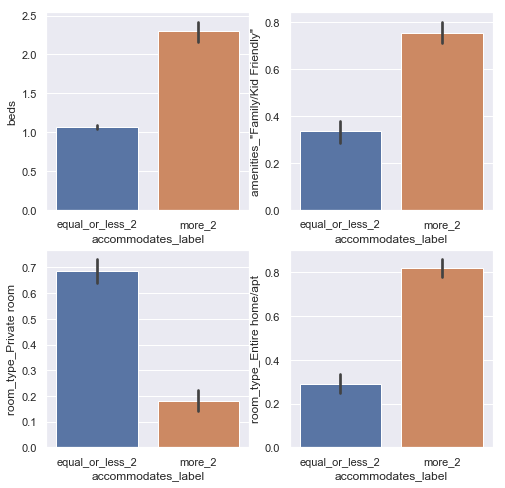

In [258]:
fig, axes = plt.subplots(2, 2,figsize=(8,8))
ax0 = sns.barplot(x='accommodates_label', y='beds', data=df_listing_modi3_high, ax=axes[0][0])
ax1 = sns.barplot(x='accommodates_label', y='amenities_"Family/Kid Friendly"', data=df_listing_modi3_high, ax=axes[0][1])
ax2 = sns.barplot(x='accommodates_label', y='room_type_Private room', data=df_listing_modi3_high, ax=axes[1][0])
ax3 = sns.barplot(x='accommodates_label', y='room_type_Entire home/apt', data=df_listing_modi3_high, ax=axes[1][1])
